In [4]:
import json
import pandas as pd

In [6]:
fn = '/Users/shapiroaj4/Desktop/analysis.json'
with open(fn, 'r') as f:
    dfj = json.load(f)


In [8]:
df = pd.DataFrame.from_dict(dfj)

In [11]:
for d in dfj:
    d['fields']['pk'] = d['pk']

In [12]:
dfj2 = [d['fields'] for d in dfj]

In [13]:
df = pd.DataFrame.from_dict(dfj2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 21 columns):
anchor              221 non-null int64
bin_number          221 non-null int64
bin_size            221 non-null int64
bin_start           221 non-null int64
created             221 non-null object
description         221 non-null object
end_time            213 non-null object
feature_list        221 non-null int64
genome_assembly     221 non-null int64
last_updated        221 non-null object
name                221 non-null object
output              221 non-null object
owner               221 non-null int64
pk                  221 non-null int64
public              221 non-null bool
slug                221 non-null object
sort_vector         2 non-null float64
start_time          220 non-null object
uuid                221 non-null object
validated           221 non-null bool
validation_notes    221 non-null object
dtypes: bool(2), float64(1), int64(8), object(10)
memory usage: 33.3

In [15]:
df.head()

,anchor,bin_number,bin_size,bin_start,created,description,end_time,feature_list,genome_assembly,last_updated,...,output,owner,pk,public,slug,sort_vector,start_time,uuid,validated,validation_notes
0,1,50,100,-2500,2016-05-24T17:29:52.961Z,,2016-08-30T21:46:26.560Z,3,1,2016-08-30T21:46:26.561Z,...,analysis/560ef965-0157-4d55-9d3c-86893c9d211c.txt,1,7,False,test,NaN,2016-08-30T21:44:17.258Z,da15255c-4688-4ad5-baf3-8e5cd342f16e,True,
1,1,50,100,-2500,2016-05-24T19:12:15.356Z,,2016-08-30T21:45:53.195Z,3,1,2016-08-30T21:45:53.196Z,...,analysis/6f7c0db6-47eb-40a5-b356-e877624c74c0.txt,1,8,True,new-run,NaN,2016-08-30T21:44:17.310Z,227dd981-a0e6-4289-903c-dc8d68c9680d,True,
2,1,50,100,-2500,2016-06-21T16:44:03.177Z,,2016-08-30T21:45:54.940Z,8,2,2016-08-30T21:45:54.941Z,...,analysis/8906f104-beb1-4bf2-89dc-cefa53e7acbc.txt,5,14,False,mesc-tss-representatives-10k-sub-sample-es-bruce4,NaN,2016-08-30T21:44:17.367Z,7d9ae1bf-9477-43d6-a17c-f3b0957c74a0,True,
3,1,50,100,-2500,2016-06-21T16:45:26.122Z,,2016-08-30T21:46:35.248Z,8,2,2016-08-30T21:46:35.249Z,...,analysis/0bb2e7cf-48a7-4c1e-a689-3c0579600b79.txt,5,15,False,mesc-tss-representatives-10k-sub-sample-es-e14,NaN,2016-08-30T21:44:17.372Z,014952e4-576c-43de-947a-dc801638add2,True,
4,1,50,100,-2500,2016-06-21T17:02:15.723Z,,2016-08-30T21:46:58.892Z,8,2,2016-08-30T21:46:58.893Z,...,analysis/a75eefbc-d0e3-4ab0-ac5b-d25c34d7a568.txt,5,16,False,mesc-tss-representatives-10k-sub-sample-all-dn...,NaN,2016-08-30T21:44:17.281Z,91429c83-ffc3-4151-bcf0-92c4736acd14,True,


In [17]:
df.start_time = pd.to_datetime(df.start_time)

In [42]:
df.end_time = pd.to_datetime(df.end_time)
df.name_str = df.name.astype(str)

In [44]:
df2 = df[['name', 'start_time', 'end_time']]

In [35]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 3 columns):
name          221 non-null object
start_time    220 non-null datetime64[ns]
end_time      213 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 5.3+ KB


,name,start_time,end_time
0,test,2016-08-30 21:44:17.258,2016-08-30 21:46:26.560
1,new run,2016-08-30 21:44:17.310,2016-08-30 21:45:53.195
2,"mESC TSS representatives (10K sub-sample), ES-...",2016-08-30 21:44:17.367,2016-08-30 21:45:54.940
3,"mESC TSS representatives (10K sub-sample), ES-E14",2016-08-30 21:44:17.372,2016-08-30 21:46:35.248
4,"mESC TSS representatives (10K sub-sample), all...",2016-08-30 21:44:17.281,2016-08-30 21:46:58.892


In [49]:
df2 = df2[df2.name.str.contains('benchmarking')]
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 29 to 217
Data columns (total 3 columns):
name          189 non-null object
start_time    189 non-null datetime64[ns]
end_time      188 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 5.9+ KB


,name,start_time,end_time
29,"benchmarking: 10 features, 2 datasets",2016-09-01 13:51:16.588,2016-09-01 13:51:27.741
30,"benchmarking: 50 features, 2 datasets",2016-09-01 13:51:28.681,2016-09-01 13:51:39.852
31,"benchmarking: 100 features, 2 datasets",2016-09-01 13:51:40.722,2016-09-01 13:52:53.198
32,"benchmarking: 500 features, 2 datasets",2016-09-01 13:52:55.880,2016-09-01 13:54:11.142
33,"benchmarking: 1000 features, 2 datasets",2016-09-01 13:54:14.039,2016-09-01 13:55:29.826


In [54]:
df2['features'] = df2.name.str.extract(r'(\d+) features')
df2['datasets'] = df2.name.str.extract(r'(\d+) datasets')
df2.head()

/Users/shapiroaj4/.virtualenvs/orio-web/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/Users/shapiroaj4/.virtualenvs/orio-web/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


,name,start_time,end_time,features,datasets
29,"benchmarking: 10 features, 2 datasets",2016-09-01 13:51:16.588,2016-09-01 13:51:27.741,10,2
30,"benchmarking: 50 features, 2 datasets",2016-09-01 13:51:28.681,2016-09-01 13:51:39.852,50,2
31,"benchmarking: 100 features, 2 datasets",2016-09-01 13:51:40.722,2016-09-01 13:52:53.198,100,2
32,"benchmarking: 500 features, 2 datasets",2016-09-01 13:52:55.880,2016-09-01 13:54:11.142,500,2
33,"benchmarking: 1000 features, 2 datasets",2016-09-01 13:54:14.039,2016-09-01 13:55:29.826,1000,2


In [56]:
df2['duration'] = df2.end_time - df2.start_time

In [57]:
df2.head()

,name,start_time,end_time,features,datasets,duration
29,"benchmarking: 10 features, 2 datasets",2016-09-01 13:51:16.588,2016-09-01 13:51:27.741,10,2,00:00:11.153000
30,"benchmarking: 50 features, 2 datasets",2016-09-01 13:51:28.681,2016-09-01 13:51:39.852,50,2,00:00:11.171000
31,"benchmarking: 100 features, 2 datasets",2016-09-01 13:51:40.722,2016-09-01 13:52:53.198,100,2,00:01:12.476000
32,"benchmarking: 500 features, 2 datasets",2016-09-01 13:52:55.880,2016-09-01 13:54:11.142,500,2,00:01:15.262000
33,"benchmarking: 1000 features, 2 datasets",2016-09-01 13:54:14.039,2016-09-01 13:55:29.826,1000,2,00:01:15.787000


In [60]:
df2.sort_values(by=['features', 'datasets'], inplace=True)

In [61]:
df2.head()

,name,start_time,end_time,features,datasets,duration
47,"benchmarking: 10 features, 10 datasets",2016-09-01 14:22:02.214,2016-09-01 14:22:14.321,10,10,00:00:12.107000
110,"benchmarking: 10 features, 10 datasets",2016-09-06 17:00:59.980,2016-09-06 17:01:11.694,10,10,00:00:11.714000
173,"benchmarking: 10 features, 10 datasets",2016-09-06 17:02:54.268,2016-09-06 17:03:05.691,10,10,00:00:11.423000
65,"benchmarking: 10 features, 100 datasets",2016-09-01 15:43:41.813,2016-09-01 15:44:03.871,10,100,00:00:22.058000
128,"benchmarking: 10 features, 100 datasets",2016-09-07 06:09:22.464,2016-09-07 06:09:42.789,10,100,00:00:20.325000


In [73]:
df2 = df2[df2.end_time.isnull()==False]
df2.duration.dtype

dtype('<m8[ns]')

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from scipy import stats

pd.options.display.mpl_style = 'default'  # ggplot

/Users/shapiroaj4/.virtualenvs/orio-web/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2869: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [98]:
df2['seconds'] = df2.duration.astype('timedelta64[s]').astype(int)
df2['features'] = df2.features.astype(int)
df2['datasets'] = df2.datasets.astype(int)

LinregressResult(slope=0.33724228908562087, intercept=0.49442995700123049, rvalue=0.98199775998335603, pvalue=3.2513296790371219e-15, stderr=0.01488228387712877)
LinregressResult(slope=0.33724228908562087, intercept=0.49442995700123049, rvalue=0.98199775998335603, pvalue=3.2513296790371219e-15, stderr=0.01488228387712877)
LinregressResult(slope=0.33724228908562087, intercept=0.49442995700123049, rvalue=0.98199775998335603, pvalue=3.2513296790371219e-15, stderr=0.01488228387712877)
LinregressResult(slope=0.33724228908562087, intercept=0.49442995700123049, rvalue=0.98199775998335603, pvalue=3.2513296790371219e-15, stderr=0.01488228387712877)
LinregressResult(slope=0.33724228908562087, intercept=0.49442995700123049, rvalue=0.98199775998335603, pvalue=3.2513296790371219e-15, stderr=0.01488228387712877)
LinregressResult(slope=0.33724228908562087, intercept=0.49442995700123049, rvalue=0.98199775998335603, pvalue=3.2513296790371219e-15, stderr=0.01488228387712877)
LinregressResult(slope=0.337

/Users/shapiroaj4/.virtualenvs/orio-web/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


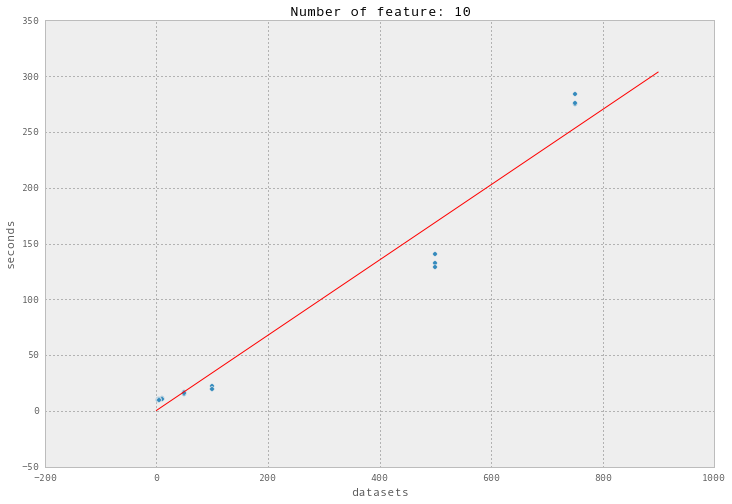

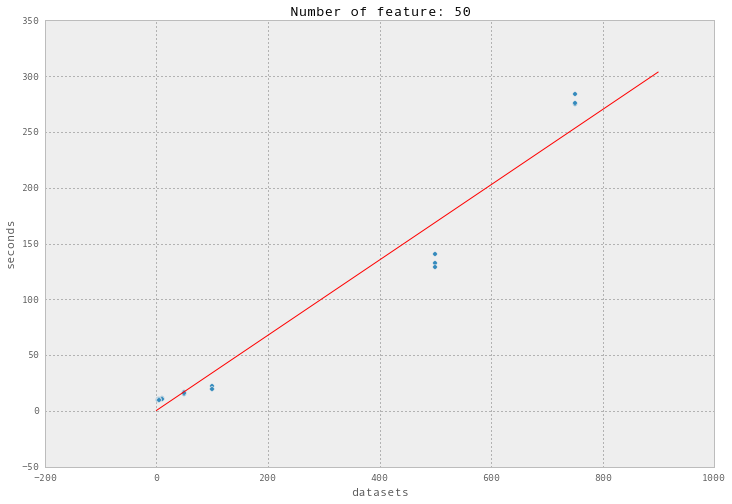

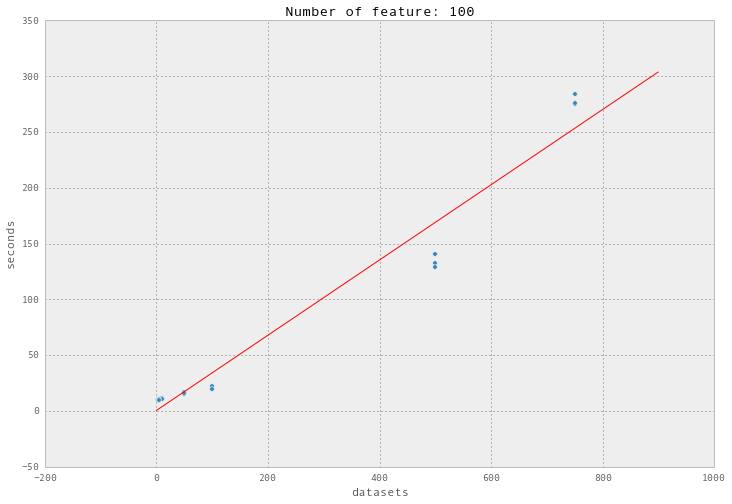

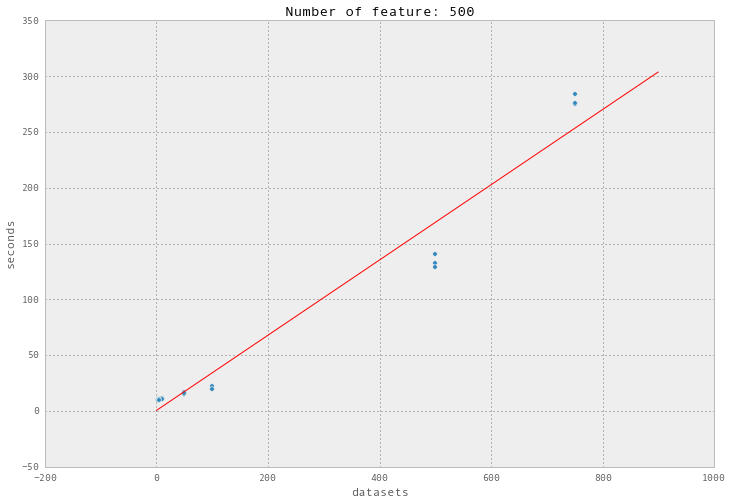

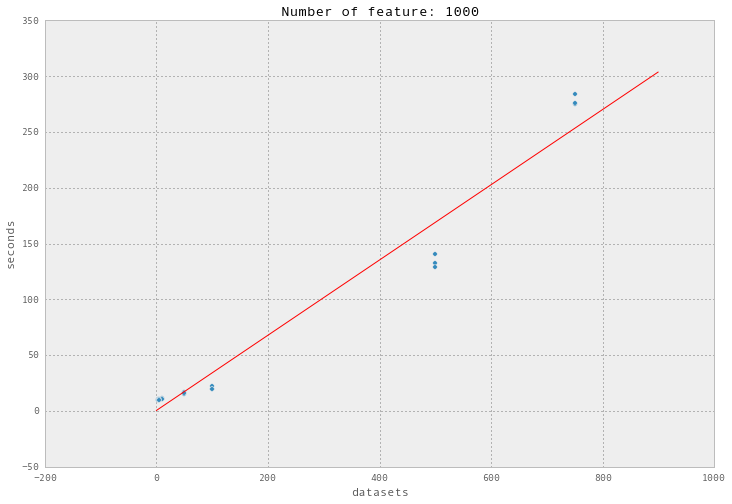

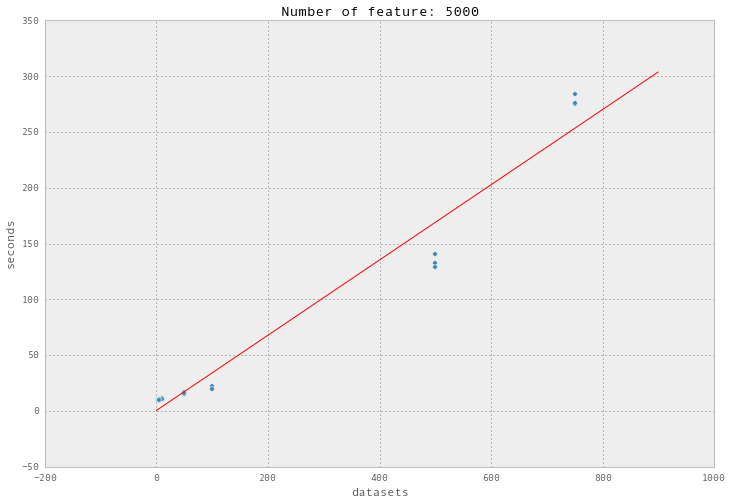

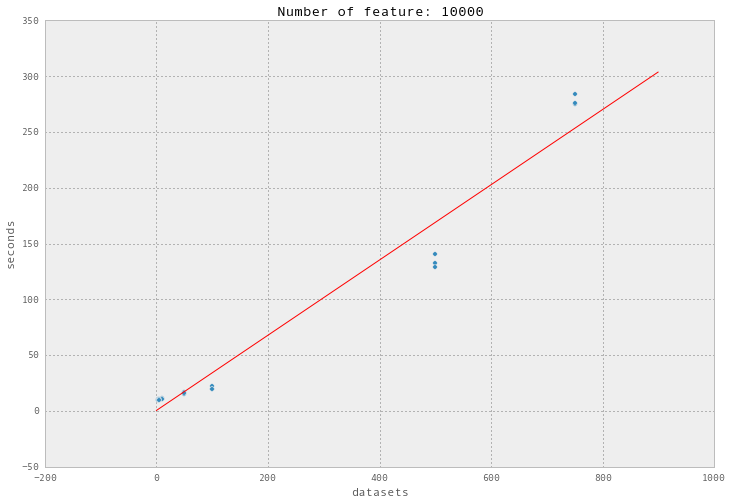

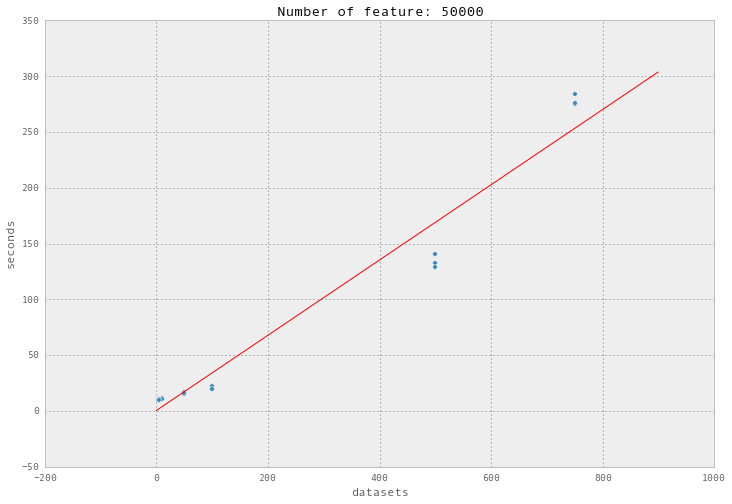

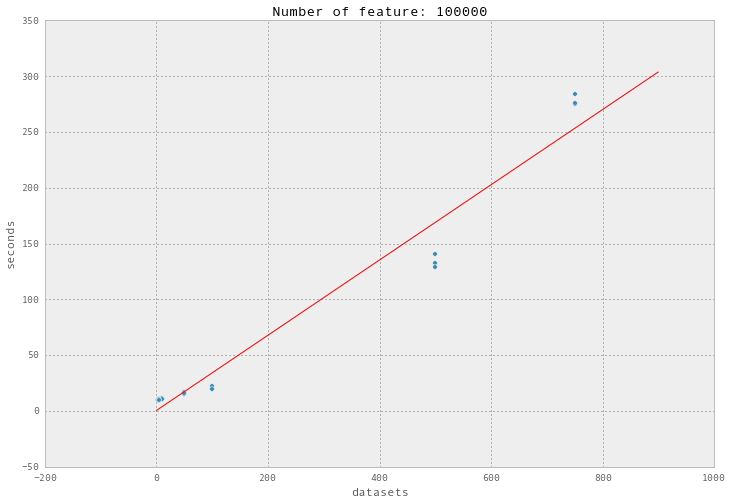

In [105]:
for fl in sorted(df2.features.unique()):
    subset = df2[df2.features==10]
    f = subset.plot(kind='scatter', x='datasets', y='seconds', figsize=(12, 8))
    f.hold= True
    m = stats.linregress(x=subset.datasets.values, y=subset.seconds.values)
    xs = np.arange(0, subset.datasets.max()*1.2, 1)
    ys = m.intercept + m.slope * xs
    f.plot(xs, ys, 'r-')
    f.set_title('Number of feature: {}'.format(fl))
    print(m)

/Users/shapiroaj4/.virtualenvs/orio-web/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


/Users/shapiroaj4/.virtualenvs/orio-web/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


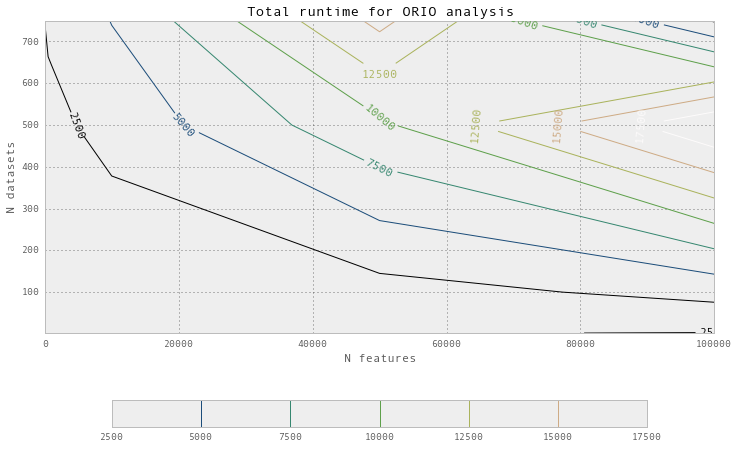

In [107]:
import matplotlib.pyplot as plt
plt.set_cmap(cm.gist_earth)

res2 = df2.groupby(['features', 'datasets']).mean()
res2.head()

X=res2.index.levels[0].values
Y=res2.index.levels[1].values
Z=res2.unstack(level=0).seconds.values

plt.figure(figsize=(12, 8))
ct = plt.contour(X, Y, Z)

plt.clabel(ct, inline=1, fmt='%d', fontsize=12)
plt.xlabel('N features')
plt.ylabel('N datasets')
plt.title('Total runtime for ORIO analysis')

plt.colorbar(ct, orientation='horizontal', shrink=0.8)

/Users/shapiroaj4/.virtualenvs/orio-web/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


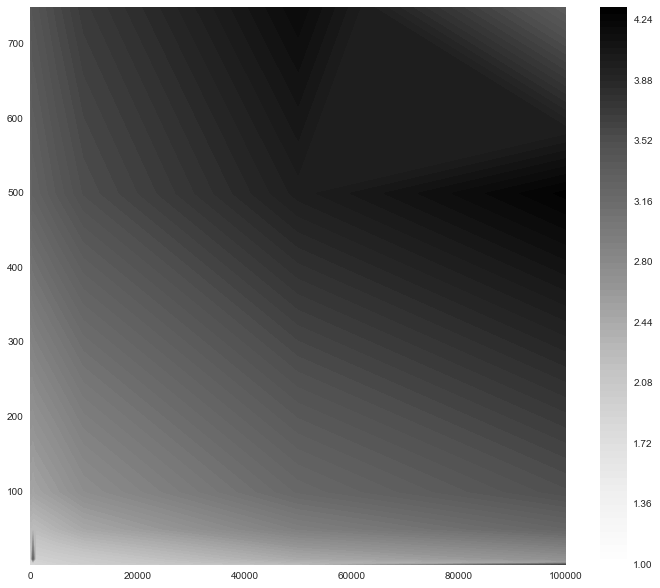

In [129]:
fig = plt.figure(figsize=(12, 10))
plt.contourf(X, Y, np.log10(Z), 100)
plt.colorbar()                                    

In [142]:
pd.DataFrame(res2.to_records()).to_csv('~/Desktop/foo.csv', index=False)